# Importing needed libraries 

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb 
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot
from sklearn.cluster import KMeans

In [ ]:
df=pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Oredering Categorical ordinal data

In [ ]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [ ]:
cat_type=pd.api.types.CategoricalDtype(categories=['some high school','high school','some college',"associate's degree","bachelor's degree","master's degree"],ordered=True)
df['parental level of education']=df['parental level of education'].astype(cat_type)

In [ ]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [ ]:
cat_type=pd.api.types.CategoricalDtype(categories=['free/reduced','standard'],ordered=True)
df['lunch']=df['lunch'].astype(cat_type)

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Engineering a new feature

In [ ]:
df['percentage']=(df['math score']+df['reading score']+df['writing score'])/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


# Exploratory Analysis

## Univariate Analysis

### The frequency of diffrent parent level education
#### this plot is plotted to inform about the diffrent parental levels of education and their frequency in data sets

In [ ]:
fig = px.histogram(df,x="parental level of education")
fig.show()

### The frequency of diffrent races or groups
#### This plot is constructed to determine the minor and most commpn races in the dataset to be analyzed later to determine is there any bias or discrimination against certain races  

In [ ]:
fig = px.histogram(df, x="race/ethnicity")
fig.show()

### The Distribution of reading scores
#### This plot is constructed to find out the distribution of reading scores , most common score ranges and most uncommon score ranges

In [ ]:
fig = px.histogram(df, x="reading score")
fig.show()

### The distribution of writing scores
#### This plot is constructed to find out the distribution of writing scores , most common score ranges and most uncommon score ranges

In [ ]:
fig = px.histogram(df, x="writing score")
fig.show()

### The distribution of math scores
#### This plot is constructed to find out the distribution of math scores , most common score ranges and most uncommon score ranges

In [ ]:
fig = px.histogram(df, x="math score")
fig.show()

## Bivariate Data Exploration

## Figuring out which gender scores higher in math

In [ ]:
fig = px.histogram(data_frame = df,
             x ='math score',
             color="gender", title="<b>gender vs math score</b>",   
)
fig.show()

Males tend to get more high scores in math than females

## Figuring out which gender scores higher in writing

In [ ]:
fig = px.histogram(data_frame = df,
             x ='writing score',
             color="gender", title="<b>gender vs writing score</b>",   
)
fig.show()

Males tend to get more high scores in math than females

#### Figuring out which gender scores higher in reading test

In [ ]:
fig = px.histogram(data_frame = df,
             x ='reading score',
             color="gender", title="<b>gender vs reading score</b>",   
)
fig.show()

Males tend to get more high scores in math than females

### figuring out the effect of test preparation course status on reading score

In [ ]:
fig = px.box(df, x="test preparation course", y="reading score")
fig.show()


fig = px.histogram(data_frame = df,
             x ='reading score',
             color="test preparation course", title="<b>test preparation course vs reading score</b>",   
)
fig.show()

### we can see a higher interquartile range of people who took the course than people who didn't in reading scores which indicates improved reading scores for people who took the course

### figuring out the effect of test preparation course status on writing score

In [ ]:
fig = px.box(df, x="test preparation course", y="writing score")
fig.show()

fig = px.histogram(data_frame = df,
             x ='writing score',
             color="test preparation course", title="<b>test preparation course vs writing score</b>",   
)
fig.show()

### we can see a higher interquartile range of people who took the course than people who didn't in writing scores which indicates improved writing scores for people who took the course

### figuring out the effect of test preparation course status on math score

In [ ]:
fig = px.box(df, x="test preparation course", y="math score")
fig.show()


fig = px.histogram(data_frame = df,
             x ='math score',
             color="test preparation course", title="<b>test preparation course vs math score</b>",   
)
fig.show()

### we can see a higher interquartile range of people who took the course than people who didn't in math scores which indicates improved math scores for people who took the course

### figuring out the effect of test preparation course status on total percentage


In [ ]:
fig = px.box(df, x="test preparation course", y="percentage")
fig.show()

fig = px.histogram(data_frame = df,
             x ='percentage',
             color="test preparation course", title="<b>test preparation course vs percentage</b>",   
)
fig.show()

### we can see a higher interquartile range of people who took the course than people who didn't in total percentage which indicates improved percentages for people who took the course

### figuring out the relationship between lunch plan and total percentage


In [ ]:
fig = px.box(df, x="lunch", y="percentage")
fig.show()

### figuring out the relationship between parental level degree and percentage


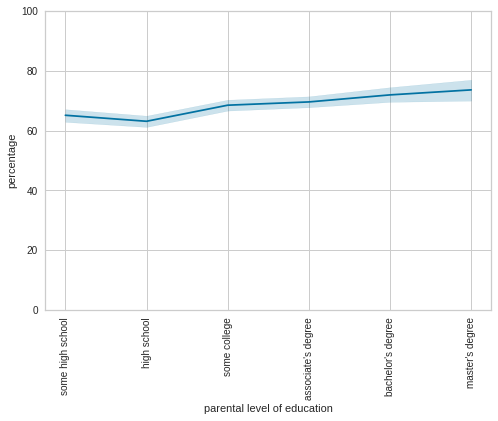

In [ ]:
sb.lineplot(data=df,x='parental level of education',y='percentage',color=sb.color_palette()[0]);
plt.ylim(0,100);
plt.xticks(rotation=90);

### We can conclude that there's no correlation between percentage and parent degree

### figuring out if race is at all correlated with total percentages

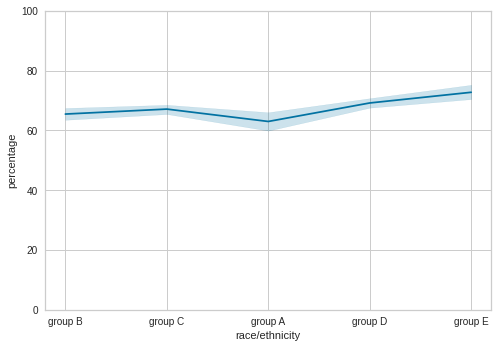

In [ ]:
sb.lineplot(data=df,x='race/ethnicity',y='percentage');
plt.ylim(0,100);

### We can conclude that there's no correlation between percentage and race or group

### We can see the people with standard lunch plans manged to have higher interquartile range than the people with free/reduced lunch 

### finding the correaltion between scores between test subjects and total percentage 


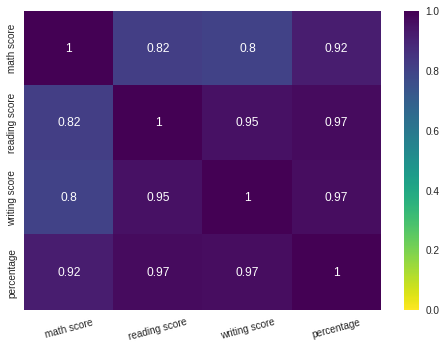

In [ ]:
sb.heatmap(df.corr(),annot=True,cmap='viridis_r',vmin=0);
plt.xticks(rotation=15);

### Writing and reading have very strong correlation with each other while having a slightly weaker yet strong correlation with Maths Score

## Multivariate Analysis

### since lunch and test preparation course are the most potential factors in total percentage we trying to find the relationship between the percentage against the two variables 4 possible states

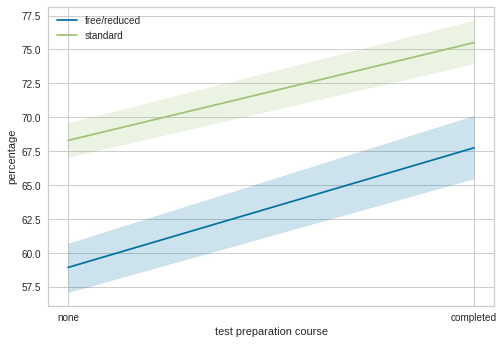

In [ ]:
sb.lineplot(data=df,x='test preparation course',y='percentage',hue='lunch');
plt.legend();

#### People with standard lunch and who took the course scored the highest on average while people with reduced lunch and didn't take the course scored the lowest on average 
#### People with standard lunch and didn't take the course and people with free/reduced lunch who took the course scored nearly the same

# Explanatory Data Analysis

In [ ]:
#bootsraping the percentage means diffrences between people who completed the course and people who didn't
means=[]
for _ in range(10000):
    samp=df.sample(df.shape[0],replace = True)
    means.append(samp[samp['test preparation course']=='completed']['percentage'].mean()-samp[samp['test preparation course']=='none']['percentage'].mean())

### The distribution of the diffrence on average between people who took the course and people who didn't

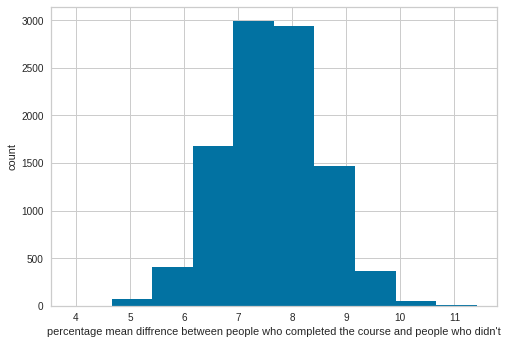

In [ ]:
plt.hist(means)
plt.xlabel("percentage mean diffrence between people who completed the course and people who didn't");
plt.ylabel('count');

### Histogram suggests that people who completed the course scored better on average 7.6% with standard deviation of 0.9%

## Hyp test 1
### H0 : mean percentage of course completed - mean percentage of couse not completed <= 0 
### HA : mean percentage of course completed - mean percentage of couse not completed > 0 

In [ ]:

null_vals=np.random.normal(0,np.std(means),len(means))

p_val = (null_vals>np.mean(means)).mean()
p_val

0.0

In [ ]:
np.min(means),np.max(means)

(3.9094344088628503, 11.413759905206383)

In [ ]:
means=[]
for _ in range(10000):
    samp=df.sample(df.shape[0],replace = True)
    means.append(samp[samp['lunch']=='standard']['percentage'].mean()-samp[samp['lunch']=='free/reduced']['percentage'].mean())

### percentage mean diffrence between people who had standard lunch plan and people who had free or reduced lunch plan 

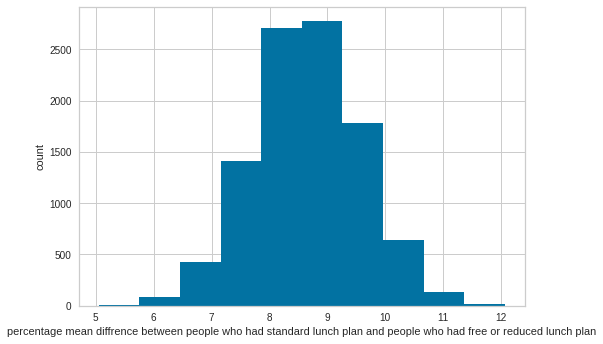

In [ ]:
plt.hist(means);
plt.xlabel("percentage mean diffrence between people who had standard lunch plan and people who had free or reduced lunch plan");
plt.ylabel('count');

### Histogram suggests people with better lunch plans scored higher on average 8.64% with standard deviation of 0.92%

## Hyp test 2
### H0 : mean percentage of standard lunch - mean percentage of free/reduced lunch <= 0 
### HA : mean percentage of standard lunch - mean percentage of free/reduced lunch > 0 


In [ ]:
null_vals=np.random.normal(0,np.std(means),len(means))
p_val = (null_vals>np.mean(means)).mean()
p_val

0.0

In [ ]:
np.min(means),np.max(means)

(5.054844239212187, 12.060299891378968)

### with 0.0 pvalue we decide to reject the null hypothes

## DATA PREPARETION

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [ ]:
#building a dataframe that discribes our data
dict=pd.DataFrame(df.dtypes,columns=['Data types'])
dict['null']=df.isnull().sum()
dict['unique vals']=df.nunique()
dict['count']=df.count()
dict

,Data types,null,unique vals,count
gender,object,0,2,1000
race/ethnicity,object,0,5,1000
parental level of education,category,0,6,1000
lunch,category,0,2,1000
test preparation course,object,0,2,1000
math score,int64,0,81,1000
reading score,int64,0,72,1000
writing score,int64,0,77,1000
percentage,float64,0,194,1000


In [ ]:
#Encoding Nominal categorical varibles
from pandas.core.reshape.reshape import get_dummies
df=pd.get_dummies(df,columns=["gender","lunch","test preparation course","race/ethnicity"],drop_first=True)

In [ ]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [ ]:
#Encoding Ordinal categorical varibles
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df.head()

,parental level of education,math score,reading score,writing score,percentage,gender_male,lunch_standard,test preparation course_none,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,1,72,72,74,72.666667,0,1,1,1,0,0,0
1,4,69,90,88,82.333333,0,1,0,0,1,0,0
2,3,90,95,93,92.666667,0,1,1,1,0,0,0
3,0,47,57,44,49.333333,1,0,1,0,0,0,0
4,4,76,78,75,76.333333,1,1,1,0,1,0,0


In [ ]:
#Appling PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced=pd.DataFrame(pca.fit_transform(df),columns=['PCA1','PCA2'])
reduced.head()

,PCA1,PCA2
0,-9.806815,1.238740
1,-29.322676,-13.746178
2,-49.787985,-0.387028
3,36.954795,-0.849486
4,-17.070062,2.032707


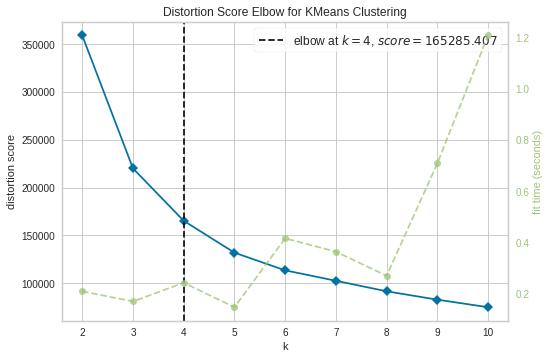

In [ ]:
#elbow method to know the number of clusters
from yellowbrick.cluster import KElbowVisualizer
model = KElbowVisualizer(KMeans(), k=10)
model.fit(df)
model.show()

By Elbow Method we can see that the best number of clusters is 4

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)
y_pridect=kmeans.fit_predict(df)
y_pridect

array([3, 0, 0, 2, 3, 3, 0, 2, 1, 2, 1, 2, 3, 3, 1, 3, 0, 2, 2, 1, 1, 3,
       2, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 2, 0, 0, 3, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 0, 2, 3, 2, 0, 0, 2, 0, 2, 1, 2, 3, 2, 1, 3, 1, 1,
       2, 3, 1, 1, 1, 1, 2, 1, 2, 2, 2, 3, 3, 1, 2, 2, 2, 1, 2, 3, 0, 3,
       1, 0, 3, 2, 3, 2, 0, 0, 1, 3, 1, 1, 3, 3, 0, 2, 0, 1, 0, 1, 1, 3,
       0, 1, 2, 1, 0, 3, 0, 3, 1, 1, 0, 0, 0, 1, 3, 0, 3, 3, 3, 2, 0, 2,
       3, 3, 3, 1, 2, 1, 1, 3, 3, 1, 2, 2, 3, 2, 0, 3, 3, 0, 1, 3, 1, 2,
       1, 0, 3, 1, 3, 1, 3, 0, 2, 2, 0, 0, 2, 3, 3, 3, 3, 0, 0, 3, 2, 0,
       1, 3, 1, 0, 3, 1, 2, 3, 2, 1, 3, 1, 2, 0, 1, 3, 1, 3, 3, 1, 1, 1,
       2, 3, 3, 3, 3, 1, 2, 3, 3, 3, 3, 1, 3, 2, 1, 1, 0, 0, 0, 2, 3, 1,
       1, 0, 1, 0, 1, 2, 3, 1, 3, 0, 3, 2, 3, 0, 0, 3, 1, 1, 2, 0, 3, 0,
       1, 2, 3, 3, 3, 1, 1, 1, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 0,
       3, 2, 3, 3, 0, 3, 1, 2, 1, 3, 0, 3, 0, 1, 3, 1, 2, 2, 3, 3, 2, 0,
       0, 3, 3, 3, 3, 3, 1, 3, 3, 1, 2, 3, 2, 0, 3,

In [ ]:
df['cluster_Kmeans']=y_pridect

In [ ]:
reduced['cluster_Kmeans']=y_pridect
reduced.head()

,PCA1,PCA2,cluster_Kmeans
0,-9.806815,1.238740,3
1,-29.322676,-13.746178,0
2,-49.787985,-0.387028,0
3,36.954795,-0.849486,2
4,-17.070062,2.032707,3


In [ ]:
reduced_centers=pca.fit_transform(kmeans.cluster_centers_)
reduced_centers

array([[-41.55192774,  -0.39946972],
       [ 12.24069797,   0.33220463],
       [ 42.57260778,  -0.35414139],
       [-13.261378  ,   0.42140648]])

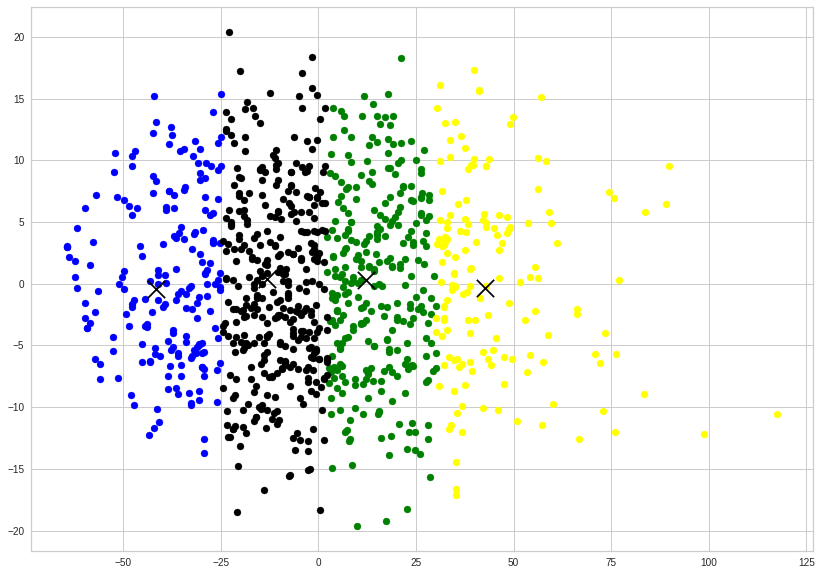

In [ ]:

#plotting clusters
plt.figure(figsize=(14,10))
plt.scatter(reduced[reduced['cluster_Kmeans'] == 0].loc[:, 'PCA1'], reduced[reduced['cluster_Kmeans'] == 0].loc[:, 'PCA2'], color='blue')
plt.scatter(reduced[reduced['cluster_Kmeans'] == 1].loc[:, 'PCA1'], reduced[reduced['cluster_Kmeans'] == 1].loc[:, 'PCA2'], color='green')
plt.scatter(reduced[reduced['cluster_Kmeans'] == 2].loc[:, 'PCA1'], reduced[reduced['cluster_Kmeans'] == 2].loc[:, 'PCA2'], color='yellow')
plt.scatter(reduced[reduced['cluster_Kmeans'] == 3].loc[:, 'PCA1'], reduced[reduced['cluster_Kmeans'] == 3].loc[:, 'PCA2'], color='black')





#plotting centers
plt.scatter(x=reduced_centers[:,0],y=reduced_centers[:,1],color='black',marker='x',s=300)
plt.show()

In [ ]:
table=pd.pivot_table(df,index=['cluster_Kmeans'])
table

,gender_male,lunch_standard,math score,parental level of education,percentage,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,reading score,test preparation course_none,writing score
cluster_Kmeans,,,,,,,,,,,,
0,0.407216,0.809278,85.335052,2.335052,87.209622,0.175258,0.278351,0.273196,0.221649,88.494845,0.458763,87.798969
1,0.515464,0.563574,58.814433,2.494845,60.312715,0.223368,0.323024,0.250859,0.099656,61.553265,0.718213,60.570447
2,0.606452,0.438710,44.393548,2.748387,45.159140,0.245161,0.303226,0.193548,0.096774,46.793548,0.819355,44.290323
3,0.441667,0.711111,70.938889,2.447222,73.059259,0.147222,0.344444,0.294444,0.147222,74.544444,0.602778,73.694444


## Conclusion of our Kmeans Model:

With respect to percentage feature we can conclude the ranges of each cluster

Cluster "1":from 0% to 45%


Cluster "3":from 46% to 60%


Cluster "0":from 61% to 73%


Cluster "2":from 74% to 87%



# Hierarchichal clustering

Ward: minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

Text(0.5, 1.0, 'dendrogram')

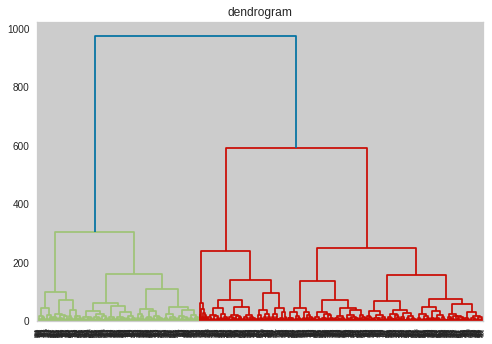

In [ ]:
import scipy.cluster.hierarchy as sch
den=sch.dendrogram(sch.linkage(df,'ward'))
plt.title('dendrogram')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
y_pridect_2=cluster.fit_predict(df)
y_pridect_2

array([0, 1, 3, 2, 1, 1, 3, 2, 0, 2, 2, 2, 1, 0, 2, 1, 3, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 1, 1, 0, 1, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 2, 0, 2, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 1, 0, 0, 2, 2, 2, 0, 2, 1, 1, 0,
       0, 1, 0, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 0, 0, 0,
       3, 0, 2, 2, 3, 1, 1, 1, 0, 0, 3, 3, 3, 0, 1, 3, 0, 1, 1, 2, 3, 2,
       1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 1, 3, 0, 0, 0, 2,
       0, 1, 1, 0, 1, 0, 1, 1, 2, 2, 3, 3, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3,
       2, 1, 0, 3, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 2,
       2, 1, 1, 1, 0, 0, 2, 0, 0, 1, 1, 0, 1, 2, 0, 2, 3, 1, 1, 2, 0, 0,
       0, 1, 0, 1, 0, 2, 0, 2, 0, 3, 0, 2, 1, 3, 1, 1, 0, 0, 2, 1, 0, 1,
       2, 2, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 1, 2, 3,
       0, 2, 1, 0, 3, 0, 0, 2, 2, 0, 1, 1, 3, 0, 1, 0, 2, 2, 1, 1, 2, 1,
       3, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 1, 1,

In [ ]:
df['cluster_agglo']=y_pridect_2


In [ ]:
table=pd.pivot_table(df,index=['cluster_agglo'])
table

,cluster_Kmeans,gender_male,lunch_standard,math score,parental level of education,percentage,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,reading score,test preparation course_none,writing score
cluster_agglo,,,,,,,,,,,,,
0,1.863326,0.519362,0.642369,63.687927,2.510251,65.077449,0.189066,0.330296,0.271071,0.120729,66.218679,0.690205,65.325740
1,1.950570,0.376426,0.718631,75.646388,2.528517,78.624842,0.186312,0.330798,0.273764,0.152091,80.596958,0.520913,79.631179
2,1.785714,0.612245,0.428571,46.545918,2.581633,47.095238,0.234694,0.301020,0.224490,0.091837,48.403061,0.795918,46.336735
3,0.000000,0.343137,0.882353,89.333333,2.088235,91.104575,0.117647,0.274510,0.264706,0.284314,92.303922,0.450980,91.676471


## Conclusion of our AgglomerativeClustering Model:

With respect to percentage feature we can conclude the ranges of each cluster

Cluster "2":from 0% to 47%


Cluster "0":from 48% to 64%


Cluster "1":from 65% to 76%


Cluster "3":from 77% to 90%

